**Question 1: XOR Gate Classification**

**II. Implement the following:**

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron

In [6]:
#XOR Truth Table
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])


The McCulloch-Pitts Neuron is a simplified model of a neuron that computes a weighted sum of its inputs and applies a threshold activation function. The single-layer perceptron model applies this principle. However, a Single Layer Perceptron can only solve linearly separable problems.

In [35]:
# Single Layer Perceptron (MCP Neuron)
slp = Perceptron(max_iter=1000, tol=1e-3, random_state=0)

# Train the perceptron model
slp.fit(X, y)

# Test the model
slp_predictions = slp.predict(X)
print("Single Layer Perceptron Predicted outputs:", slp_predictions)
print("Actual outputs:", y)


Single Layer Perceptron Predicted outputs: [0 0 0 0]
Actual outputs: [0 1 1 0]


In [36]:
# Performance Observation
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y, slp_predictions)
print("Single Layer Perceptron Accuracy:", accuracy)


Single Layer Perceptron Accuracy: 0.5


* The Single Layer Perceptron outputs are likely to be incorrect for the XOR inputs, particularly for (0,1) and (1,0).

* The accuracy will show a score of 50% or less, confirming that it cannot correctly classify the XOR gate because it is not linearly separable.


A Single Layer Perceptron can only solve linearly separable problems. XOR is not linearly separable because there is no single straight line that can divide the output classes in a 2D space. Therefore, to solve XOR, we need a more powerful model capable of handling non-linear relationships.

**MLP**

To solve the XOR problem, we introduce a Multi-Layer Perceptron with a hidden layer. An MLP can model complex decision boundaries due to the introduction of non-linearity through the hidden layer's neurons and activation functions.

In [32]:
from sklearn.neural_network import MLPClassifier
import numpy as np

In [33]:
# XOR Truth Table
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])


In [25]:
# Implementing the MLP Model
mlp = MLPClassifier(hidden_layer_sizes=(5,), activation='tanh', solver='adam', max_iter=2000, learning_rate_init=0.01, random_state=1)

# Training the MLP model
mlp.fit(X, y)

# Testing the MLP model
mlp_predictions = mlp.predict(X)
print("MLP Predicted outputs:", mlp_predictions)
print("Actual outputs:", y)


MLP Predicted outputs: [0 1 1 0]
Actual outputs: [0 1 1 0]


The Multi-Layer Perceptron predicts the XOR function correctly because it can handle non-linear separability through the hidden layer, allowing it to learn the complex relationships between the inputs.

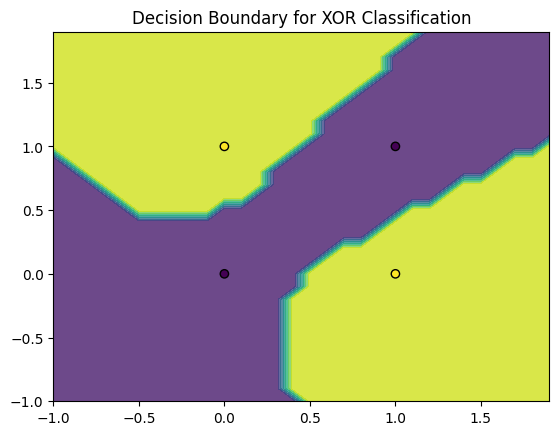

In [29]:
import matplotlib.pyplot as plt

# Plotting
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title('Decision Boundary for XOR Classification')
    plt.show()

# Visualize
plot_decision_boundary(X, y, mlp)


* Multi-Layer Perceptron: Successfully classified the XOR function using a hidden layer, demonstrating the capability of neural networks to learn non-linear relationships.

* Visualization: Displayed the decision boundary created by the MLP, showing how it can separate the classes.

**Question 2:**

**A. Sentiment Analysis Twitter Airline**

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score


In [26]:
df = pd.read_csv("/content/Tweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [27]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [28]:
print(df.isnull().sum())

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


In [29]:
def handle_missing_values(df):
    df['negativereason'].fillna('Unknown', inplace=True)
    df['airline_sentiment_gold'].fillna(0, inplace=True)
    df['negativereason_confidence'].fillna(df['negativereason_confidence'].mean(), inplace=True)
    df['tweet_coord'].fillna('Unknown', inplace=True)
    df['tweet_location'].fillna('Unknown', inplace=True)
    df['user_timezone'].fillna('Unknown', inplace=True)

    df.drop(columns=['airline_sentiment_gold', 'negativereason_gold'], inplace=True)
    return df

df = handle_missing_values(df)

print("\nUpdated DataFrame Info:")
df.info()

remaining_missing_values = df.isnull().sum()
print("\nMissing Values:\n", remaining_missing_values)


Updated DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                14640 non-null  object 
 4   negativereason_confidence     14640 non-null  float64
 5   airline                       14640 non-null  object 
 6   name                          14640 non-null  object 
 7   retweet_count                 14640 non-null  int64  
 8   text                          14640 non-null  object 
 9   tweet_coord                   14640 non-null  object 
 10  tweet_created                 14640 non-null  object 
 11  tweet_location                14640 non-null  object 
 12  user_timezone                 14640

* To convert categorical sentiment labels ('positive', 'negative','neutral') into numerical format using LabelEncoder, which simplifies model training.

* Implementation: Apply LabelEncoder to the airline_sentiment column, converting it to binary numerical values (0 and 1).

In [30]:
# Encoding labels
label_encoder = LabelEncoder()
df['airline_sentiment'] = label_encoder.fit_transform(df['airline_sentiment'])


X = df[['airline_sentiment_confidence']]
y = df['airline_sentiment']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, activation_function='sigmoid'):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.activation_function = activation_function

        # Weights initialization
        self.weights_input_hidden = np.random.rand(self.input_size, self.hidden_size)
        self.weights_hidden_output = np.random.rand(self.hidden_size, self.output_size)

        # Bias initialization
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.bias_output = np.zeros((1, self.output_size))

    def activation(self, x):
        if self.activation_function == 'sigmoid':
            return 1 / (1 + np.exp(-x))
        elif self.activation_function == 'tanh':
            return np.tanh(x)
        elif self.activation_function == 'relu':
            return np.maximum(0, x)

    def activation_derivative(self, x):
        if self.activation_function == 'sigmoid':
            return x * (1 - x)
        elif self.activation_function == 'tanh':
            return 1 - np.tanh(x) ** 2
        elif self.activation_function == 'relu':
            return (x > 0).astype(float)

    def forward(self, X):
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = self.activation(self.hidden_input)
        self.final_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.final_output = self.activation(self.final_input)
        return self.final_output

    def backward(self, X, y, learning_rate): #backpropagation
        # Calculating the error
        output_error = self.final_output - y.reshape(-1, 1)
        output_delta = output_error * self.activation_derivative(self.final_output)

        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_delta = hidden_error * self.activation_derivative(self.hidden_output)

        # Updating weights and biases
        self.weights_hidden_output -= np.dot(self.hidden_output.T, output_delta) * learning_rate
        self.bias_output -= np.sum(output_delta, axis=0, keepdims=True) * learning_rate

        self.weights_input_hidden -= np.dot(X.T, hidden_delta) * learning_rate
        self.bias_hidden -= np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            self.forward(X)
            self.backward(X, y, learning_rate)

    def predict(self, X):
        output = self.forward(X)
        return (output > 0.5).astype(int).flatten()


In [40]:
# Training parameters
epochs = 1000
learning_rate = 0.01

activation_functions = ['sigmoid', 'tanh', 'relu']
losses = []

for activation in activation_functions:
    print(f"\nTraining with {activation} activation function:")
    nn = NeuralNetwork(input_size=X_train.shape[1], hidden_size=5, output_size=1, activation_function=activation)

    # Training the model
    nn.train(X_train.values, y_train.values, epochs, learning_rate)

    # Calculating training loss
    final_output = nn.forward(X_train.values)
    loss = np.mean((final_output - y_train.values.reshape(-1, 1)) ** 2)
    losses.append(loss)

    # Evaluating the model
    y_pred = nn.predict(X_test.values)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}, Loss: {loss:.4f}")



Training with sigmoid activation function:
Accuracy: 0.1981, Loss: 0.6845

Training with tanh activation function:
Accuracy: 0.6452, Loss: 2.9458

Training with relu activation function:
Accuracy: 0.6452, Loss: 0.8654


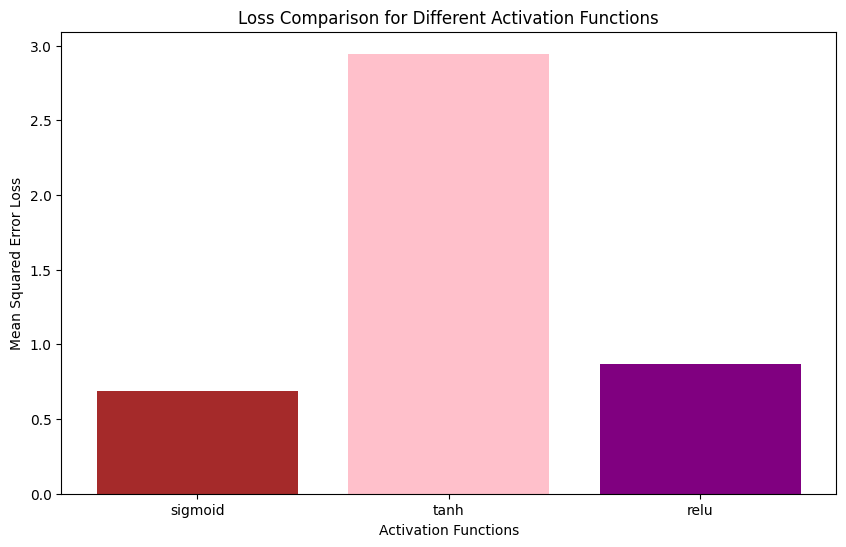

In [42]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(activation_functions, losses, color=['brown', 'pink', 'purple'])
plt.title('Loss Comparison for Different Activation Functions')
plt.xlabel('Activation Functions')
plt.ylabel('Mean Squared Error Loss')
plt.show()


Interpretation: Sigmoid

* The accuracy is very low (19.81%), which means the model is performing poorly in classifying sentiments.
* A loss of 0.6845 is moderate, but since the accuracy is low, the model is not learning effectively from the data.
* Sigmoid functions tend to suffer from the vanishing gradient problem during backpropagation, especially in deeper networks. This makes it hard for the model to converge, leading to poor performance in this case.

Interpretation:tanh

* The accuracy is much higher (64.52%), indicating that the model is performing reasonably well in classifying sentiments.
* However, the loss is quite large at 2.9458. This could indicate that while the model is correctly predicting more labels it may not be fully confident in its predictions so by having large errors when the network misclassifies instances.
* The tanh function is generally better than sigmoid for training because it outputs values between -1 and 1, centering the data and allowing faster convergence.

Interpretation:ReLu

* The accuracy of 64.52% matches the performance of the tanh activation function, which suggests both functions are equally effective at classification in terms of accuracy.
* The loss is significantly lower (0.8654) compared to the tanh function indicating that the model is more confident in its predictions and is making fewer large mistakes.
* The ReLU function is often preferred because it avoids the vanishing gradient problem and helps networks converge faster. The lower loss combined with the same accuracy suggests ReLU may be better at optimizing the network and reducing errors.